<a href="https://colab.research.google.com/github/vansh-21/Comparison-of-various-ML-Classifiers-in-credit-risk-analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(32581, 12)
##################### Types #####################
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
##################### Head #####################
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4   

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
 """  Extracts and categorizes columns in a DataFrame.

    This function classifies the columns of a Pandas DataFrame into categorical, numerical,
    and high-cardinality categorical columns. Categorical columns contain categorical data,
    numerical columns contain numerical data, and high-cardinality categorical columns
    are categorical but have a large number of unique categories.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        cat_th (int, optional): Threshold for determining categorical numerical columns.
                                If a numerical column has fewer unique values than this threshold,
                                it's considered categorical. Defaults to 10.
        car_th (int, optional): Threshold for determining high-cardinality categorical columns.
                                If a categorical column has more unique values than this threshold,
                                it's considered high-cardinality. Defaults to 20.

    Returns:
        tuple: A tuple containing three lists:
            - cat_cols (list): List of categorical column names.
            - num_cols (list): List of numerical column names.
            - cat_but_car (list): List of high-cardinality categorical column names.

    Examples:
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    """

'  Extracts and categorizes columns in a DataFrame.\n\n   This function classifies the columns of a Pandas DataFrame into categorical, numerical,\n   and high-cardinality categorical columns. Categorical columns contain categorical data,\n   numerical columns contain numerical data, and high-cardinality categorical columns\n   are categorical but have a large number of unique categories.\n\n   Args:\n       dataframe (pd.DataFrame): The input DataFrame.\n       cat_th (int, optional): Threshold for determining categorical numerical columns.\n                               If a numerical column has fewer unique values than this threshold,\n                               it\'s considered categorical. Defaults to 10.\n       car_th (int, optional): Threshold for determining high-cardinality categorical columns.\n                               If a categorical column has more unique values than this threshold,\n                               it\'s considered high-cardinality. Defaults to 2

In [ ]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                    df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                    df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car= grab_col_names(df)

Observations: 32581
Variables: 12
cat_cols: 5
num_cols: 7
cat_but_car: 0
num_but_cat: 1


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                   n_miss  ratio
loan_int_rate        3116   9.56
person_emp_length     895   2.75


In [ ]:
def quick_missing_imp(data, num_method="median", cat_length=20, target=""):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Variables containing missing data are identified

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    #If num_method is 'mean', fill the missing values of non-object type variables with the mean
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

    #If num_method is 'median', fill the missing values of non-object type variables with the median
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df,target="loan_status")

# BEFORE
person_emp_length     895
loan_int_rate        3116
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

person_emp_length    0
loan_int_rate        0
dtype: int64 




In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
num_ = ["person_age","person_emp_length"]
for col in num_:
    df = remove_outliers(df,col)

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df,num_cols,q1=0.05,q3=0.95)

(person_age                         1.00
 person_income                -145500.00
 person_emp_length                -16.50
 loan_amnt                     -30175.00
 loan_int_rate                     -9.36
 loan_percent_income               -0.47
 cb_person_cred_hist_length       -11.50
 dtype: float64,
 person_age                        57.00
 person_income                 303300.00
 person_emp_length                 27.50
 loan_amnt                      55625.00
 loan_int_rate                     31.68
 loan_percent_income                0.89
 cb_person_cred_hist_length        24.50
 dtype: float64)

In [ ]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    print(col,check_outlier(df,col,q1=0.05,q3=0.95))
    if check_outlier(df, col,q1=0.05,q3=0.95):
        replace_with_thresholds(df, col,q1=0.05,q3=0.95)

person_age False
person_income True
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,30392.0,26.647111,4.425236,20.00,23.00,25.00,29.00,40.00
person_income,30392.0,63985.023756,39282.644131,4080.00,38238.00,55000.00,78000.00,303300.00
person_emp_length,30392.0,4.417643,3.380452,0.00,2.00,4.00,7.00,14.00
loan_amnt,30392.0,9534.317419,6279.474453,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,30392.0,11.017091,3.077190,5.42,8.49,10.99,13.11,23.22
loan_status,30392.0,0.219564,0.413958,0.00,0.00,0.00,0.00,1.00
loan_percent_income,30392.0,0.170933,0.106805,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,30392.0,5.229534,3.282588,2.00,3.00,4.00,7.00,17.00


<ipython-input-16-26c409bd5340>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=df,ax=ax[1],palette="viridis")


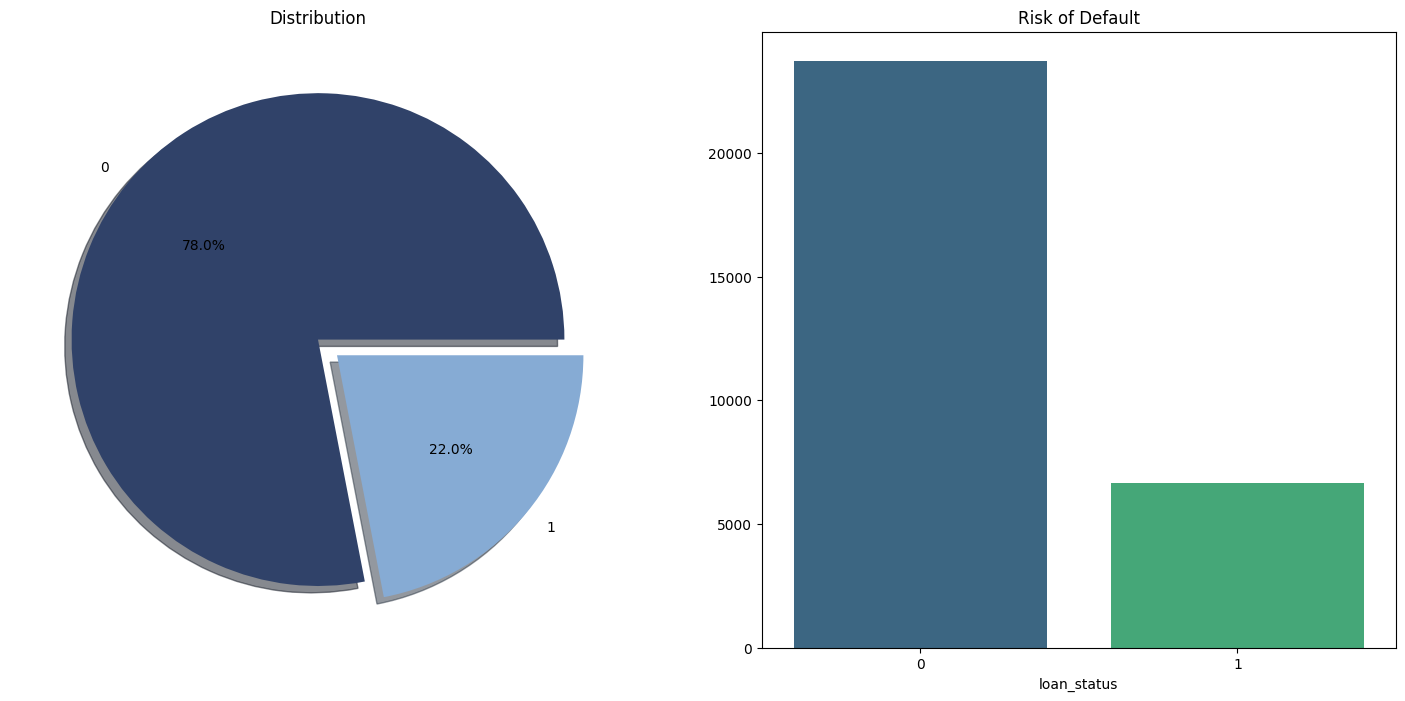

In [ ]:
#(Imbalanced Datasets)
f,ax=plt.subplots(1,2,figsize=(18,8))
df.loan_status.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,fontsize=10,colors=["#304269","#86ABD4"])
ax[0].set_title('Distribution', fontsize=12, weight='normal')
ax[0].set_ylabel('')
sns.countplot(x='loan_status',data=df,ax=ax[1],palette="viridis")
ax[1].set_title('Risk of Default', fontsize=12, weight='normal')
ax[1].set_xlabel('loan_status', fontsize=10)
ax[1].set_ylabel('', fontsize=10)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
plt.show()

###Data Analysis

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
chart1_tbl = df.groupby("loan_intent")[["loan_amnt"]].mean().reset_index()

<ipython-input-19-781b068340d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  csb = sns.barplot(y="loan_intent", x="loan_amnt", data=chart1_tbl, palette="crest_r")
<ipython-input-19-781b068340d5>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  csb.set_yticklabels(["Debt Consolidation", "Education", "Home Improvement", "Medical", "Personal", "Venture"], fontsize=10, weight='normal')


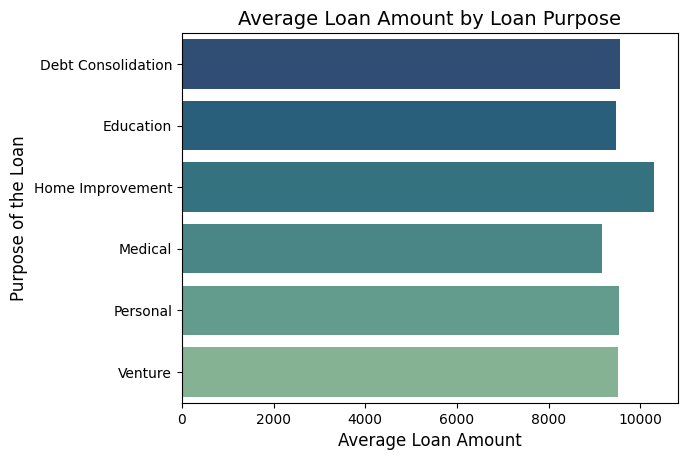

In [ ]:
csb = sns.barplot(y="loan_intent", x="loan_amnt", data=chart1_tbl, palette="crest_r")

plt.xlabel("Average Loan Amount", fontsize=12, weight='normal')
plt.ylabel("Purpose of the Loan", fontsize=12, weight='normal')
plt.title("Average Loan Amount by Loan Purpose", fontsize=14, weight='normal')
csb.set_yticklabels(["Debt Consolidation", "Education", "Home Improvement", "Medical", "Personal", "Venture"], fontsize=10, weight='normal')
plt.xticks(fontsize=10, weight='normal')

plt.show()

In [ ]:
bins = [0,25, 30, 35, 40]
labels = ['0-25', '26-30', '31-35', '36-40']

df['person_age_cat'] = pd.cut(df['person_age'], bins=bins, labels=labels)

In [ ]:
df["total_pay_back"] = df.loan_amnt + (df.loan_amnt*(df.loan_int_rate/100))

In [ ]:
bins = [0,500, 5000, 8000, 12000 ,35000]
labels = ['0-500', '501-5000', '5001-8000', '8001-12000',"12001-35000"]

df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels)

In [ ]:
df.groupby(["loan_amnt_cat"])[["total_pay_back"]].mean().reset_index()

<ipython-input-23-e1f0667d6ed8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["loan_amnt_cat"])[["total_pay_back"]].mean().reset_index()


,loan_amnt_cat,total_pay_back
0,0-500,553.330000
1,501-5000,3852.634640
2,5001-8000,7495.653421
3,8001-12000,11458.153733
4,12001-35000,20637.801271


In [ ]:
chart2_tbl = df.groupby(["loan_amnt_cat"])[["person_income"]].mean().reset_index()

<ipython-input-24-4bd5562509e6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart2_tbl = df.groupby(["loan_amnt_cat"])[["person_income"]].mean().reset_index()


In [ ]:
chart2_tbl

,loan_amnt_cat,person_income
0,0-500,26080.800000
1,501-5000,49829.503924
2,5001-8000,57449.590339
3,8001-12000,65554.282095
4,12001-35000,85197.041987


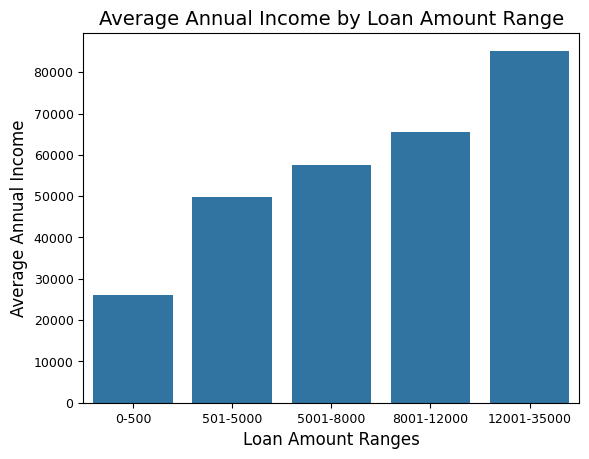

In [ ]:
sns.barplot(x="loan_amnt_cat", y="person_income", data=chart2_tbl)

plt.xlabel("Loan Amount Ranges", fontsize=12, weight='normal')
plt.ylabel("Average Annual Income", fontsize=12, weight='normal')
plt.title("Average Annual Income by Loan Amount Range", fontsize=14, weight='normal')
plt.xticks(fontsize=9, weight="normal")
plt.yticks(fontsize=9, weight="normal")
plt.show()

<ipython-input-27-2e28fc0caec7>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  csh.set_xticklabels(["Owned", "Mortgage", "Rent", "Other"], fontsize=10, weight='normal')


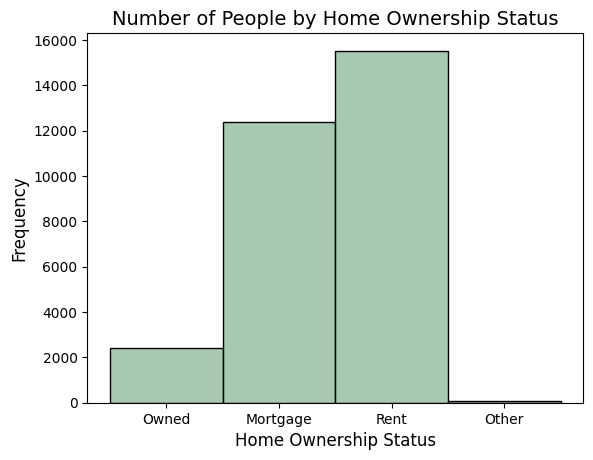

In [ ]:
csh = sns.histplot(df.person_home_ownership, color="#8db699")
plt.xlabel("Home Ownership Status", fontsize=12, weight='normal')
plt.ylabel("Frequency", fontsize=12, weight='normal')
plt.title("Number of People by Home Ownership Status", fontsize=14, weight='normal')
csh.set_xticklabels(["Owned", "Mortgage", "Rent", "Other"], fontsize=10, weight='normal')
plt.yticks(fontsize=10, weight='normal')
plt.show()

In [ ]:
chart3_tbl = df.groupby(["loan_grade"])[["loan_amnt"]].mean().reset_index()
chart3_tbl

,loan_grade,loan_amnt
0,A,8511.744464
1,B,9918.636131
2,C,9201.356269
3,D,10737.496285
4,E,12734.668508
5,F,14556.900452
6,G,17256.355932


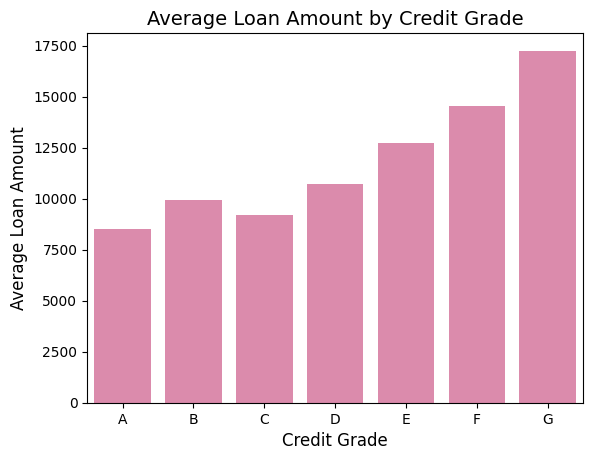

In [ ]:
sns.barplot(x="loan_grade", y="loan_amnt", data=chart3_tbl, color="#e87eaa")
plt.xlabel("Credit Grade", fontsize=12, weight='normal')
plt.ylabel("Average Loan Amount", fontsize=12, weight='normal')
plt.title("Average Loan Amount by Credit Grade", fontsize=14, weight='normal')
plt.xticks(fontsize=10, weight='normal')
plt.yticks(fontsize=10, weight='normal')
plt.show()

In [ ]:
chart4_tbl = df.groupby(["loan_grade"])[["loan_int_rate"]].mean().reset_index()
chart4_tbl

,loan_grade,loan_int_rate
0,A,7.675307
1,B,10.997822
2,C,13.232337
3,D,14.984437
4,E,16.474000
5,F,17.783575
6,G,19.756102


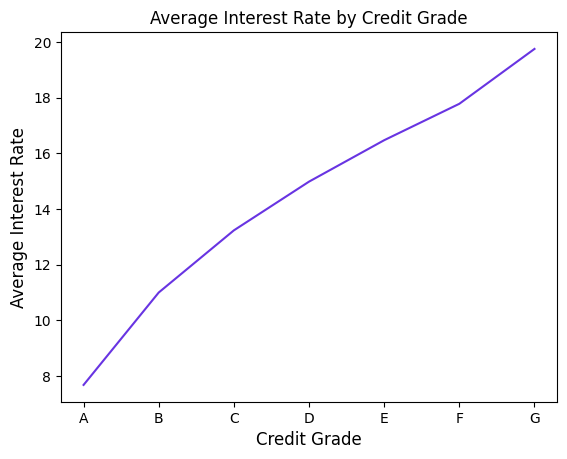

In [ ]:
sns.lineplot(x="loan_grade", y="loan_int_rate", data=chart4_tbl, color="#6834e2")
plt.xlabel("Credit Grade", fontsize=12, weight='normal')
plt.ylabel("Average Interest Rate", fontsize=12, weight='normal')
plt.title("Average Interest Rate by Credit Grade", fontsize=12, weight='normal')
plt.xticks(fontsize=10, weight='normal')
plt.yticks(fontsize=10, weight='normal')
plt.show()

In [ ]:
chart5_tbl = df.groupby(["person_age_cat"])[["person_emp_length"]].mean().reset_index()
chart5_tbl

<ipython-input-31-8aea99b64cf3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart5_tbl = df.groupby(["person_age_cat"])[["person_emp_length"]].mean().reset_index()


,person_age_cat,person_emp_length
0,0-25,4.031987
1,26-30,5.120330
2,31-35,4.277068
3,36-40,4.314773


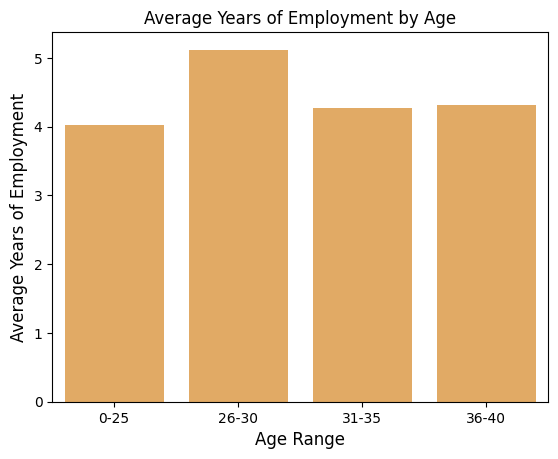

In [ ]:
sns.barplot(x="person_age_cat", y="person_emp_length", data=chart5_tbl, color="#f6ac50")
plt.xlabel("Age Range", fontsize=12, weight='normal')
plt.ylabel("Average Years of Employment", fontsize=12, weight='normal')
plt.title("Average Years of Employment by Age", fontsize=12, weight='normal')
plt.xticks(fontsize=10, weight='normal')
plt.yticks(fontsize=10, weight='normal')
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df_copy.columns if df_copy[col].dtypes == "O" and df_copy[col].nunique() == 2]

for col in binary_cols:
    if col != "loan_status":
        df_copy=label_encoder(df_copy,col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df_copy.columns if 10 >= df_copy[col].nunique() > 2]

df_copy = one_hot_encoder(df_copy, ohe_cols, drop_first=True)

In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost
!pip install --upgrade lightgbm
!pip install --upgrade catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [ ]:
X = df_copy.drop(["loan_status"], axis=1)
y = df_copy["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 17)
df_copy

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,total_pay_back,...,loan_grade_E,loan_grade_F,loan_grade_G,person_age_cat_26-30,person_age_cat_31-35,person_age_cat_36-40,loan_amnt_cat_501-5000,loan_amnt_cat_5001-8000,loan_amnt_cat_8001-12000,loan_amnt_cat_12001-35000
1,21,9600,5.0,1000,11.14,0,0.10,0,2,1111.40,...,False,False,False,False,False,False,True,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,0,3,6207.85,...,False,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,35000,15.23,1,0.53,0,2,40330.50,...,False,False,False,False,False,False,False,False,False,True
4,24,54400,8.0,35000,14.27,1,0.55,1,4,39994.50,...,False,False,False,False,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,0,2,2678.50,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,40,33000,2.0,1000,10.99,0,0.03,0,15,1109.90,...,False,False,False,False,False,True,True,False,False,False
32290,37,90000,11.0,4000,6.62,0,0.04,0,15,4264.80,...,False,False,False,False,False,True,True,False,False,False
32292,38,200000,0.0,3000,7.68,0,0.01,0,12,3230.40,...,False,False,False,False,False,True,True,False,False,False
32293,38,110000,5.0,16000,11.99,0,0.15,0,13,17918.40,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [ ]:
models = [('LR', LogisticRegression(random_state=12345)),
           ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
           ('RF', RandomForestClassifier(random_state=12345)),
          ('GBM', GradientBoostingClassifier(random_state=12345)),
          ("XGBoost", XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345,verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False,random_state=12345))]

In [ ]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy","f1"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"F1-Score: {round(cv_results['test_f1'].mean(), 4)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


########## LR ##########
Accuracy: 0.8167
F1-Score: 0.4081
########## KNN ##########
Accuracy: nan
F1-Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/skle

########## CART ##########
Accuracy: 0.8586
F1-Score: 0.7047
########## RF ##########
Accuracy: 0.9203
F1-Score: 0.7956
########## GBM ##########
Accuracy: 0.914
F1-Score: 0.7743
########## XGBoost ##########
Accuracy: 0.914
F1-Score: 0.789
########## LightGBM ##########
Accuracy: 0.9208
F1-Score: 0.7986
########## CatBoost ##########
Accuracy: 0.9265
F1-Score: 0.8127


In [ ]:
param = {'colsample_bytree': 0.75,
 'learning_rate': 0.29,
 'max_depth': 11,
 'min_child_weight': 0.04,
 'num_leaves': 1667,
 'subsample': 0.65}

In [ ]:
lgbm_model = LGBMClassifier(**param,random_state=42,verbose=-1).fit(X_train,y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_ = f1_score(y_test,y_pred)
print(f"F1: {f1_:.4f}")

F1: 0.8346


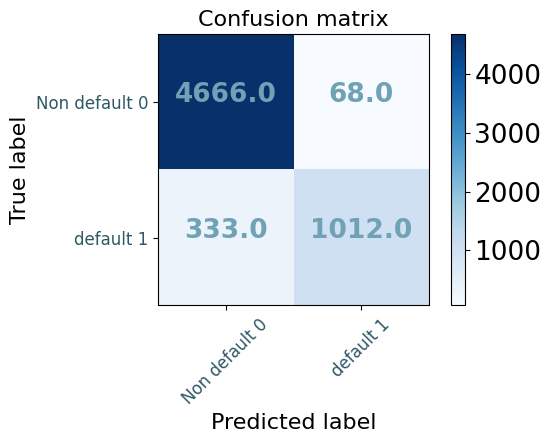

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report
from matplotlib import rc,rcParams
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="#2f5866")
    plt.yticks(tick_marks, classes,fontsize=12,color="#2f5866")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="#70a2b6")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non default 0','default 1'],
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4734
           1       0.94      0.75      0.83      1345

    accuracy                           0.93      6079
   macro avg       0.94      0.87      0.90      6079
weighted avg       0.93      0.93      0.93      6079



In [ ]:
y_train.value_counts()

,count
loan_status,
0,18985
1,5328


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train,y_train)

In [ ]:
y_smote.value_counts()

,count
loan_status,
0,18985
1,18985


In [ ]:
lgbm_model.fit(X_smote, y_smote)
y_pred_sro = lgbm_model.predict(X_test)

f1_sro = f1_score(y_test, y_pred_sro)
print("F1-Score: %.3f%" % (f1_sro))

NameError: name 'lgbm_model' is not defined

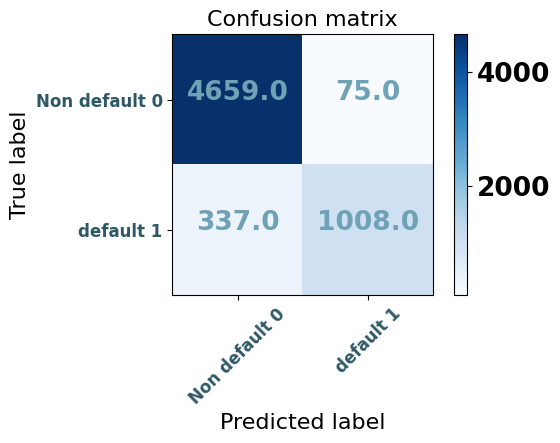

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred_sro), classes=['Non default 0','default 1'],
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred_sro))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4734
           1       0.93      0.75      0.83      1345

    accuracy                           0.93      6079
   macro avg       0.93      0.87      0.89      6079
weighted avg       0.93      0.93      0.93      6079

